# Prevendo se uma pessoa tem problemas cardíacos conforme uma lista de parametros

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
data = pd.read_csv('cardio_train.csv', sep = ';', index_col = 'id')

In [13]:
data.head(7)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0


In [7]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


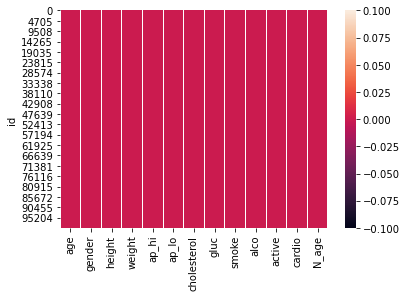

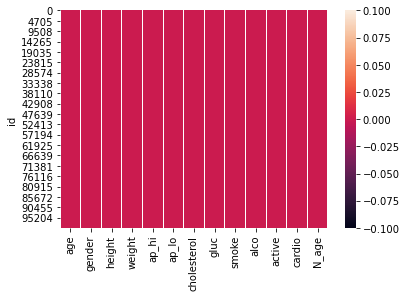

(age            0
 gender         0
 height         0
 weight         0
 ap_hi          0
 ap_lo          0
 cholesterol    0
 gluc           0
 smoke          0
 alco           0
 active         0
 cardio         0
 N_age          0
 dtype: int64,
 age            0
 gender         0
 height         0
 weight         0
 ap_hi          0
 ap_lo          0
 cholesterol    0
 gluc           0
 smoke          0
 alco           0
 active         0
 cardio         0
 N_age          0
 dtype: int64)

In [25]:
sns.heatmap(data.isnull())
plt.show()
sns.heatmap(data.isna())
plt.show()
data.isnull().sum(),data.isna().sum()

Não temos dados faltando no nosso dataset.
E também não tem,os dados categóricos. Não precisaremos fazer encoders ou dummy variables.

Vamos trocar os valores da coluna idade, pois os mesmos estão em dias. E é uma boa medida evitar termos valores muito discrepantes entre as colunas do dataset na hora de treinarmos os modelos.

In [16]:
data['N_age'] = data['age'].map(lambda x : int(x/365))

Vamos aproveitar e mudar a numeração dos dados categóricos de sexo para $1$ homem e $0$ mulher

In [21]:
data['gender'] = data['gender'].map(lambda x : 1 if x == 2 else 0)

In [27]:
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

O conjunto de datos está bem dividido, o que é uma boa prática

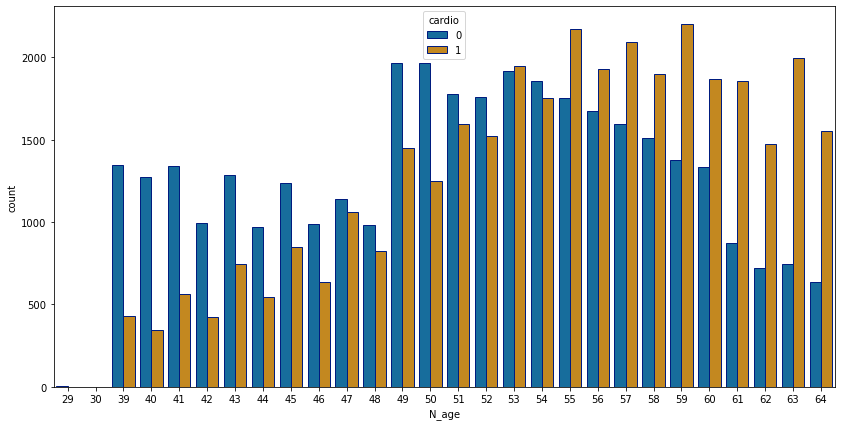

In [38]:
plt.figure(figsize = (14,7))
sns.countplot(x = 'N_age',hue = 'cardio', data = data, palette = 'colorblind', edgecolor = sns.color_palette('dark',1) )
plt.show()

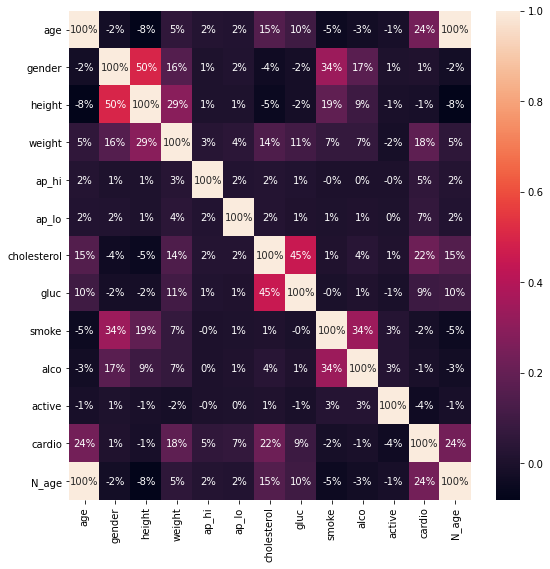

In [40]:
plt.figure(figsize = (9,9))
sns.heatmap(data.corr(),annot = True, fmt = '.0%')
plt.show()

podemos ver que as colunas $age$ e $N$_$age$ são 'equivalentes', não estamos adicionando informação nova tendo estas duas colunas por isso vamos retirar $age$.

In [ ]:
data.drop('age', axis = 1, inplace = True)

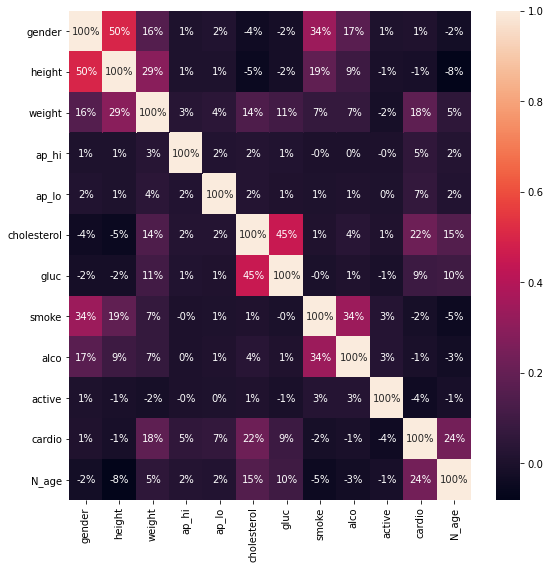

In [46]:
plt.figure(figsize = (9,9))
sns.heatmap(data.corr(),annot = True, fmt = '.0%')
plt.show()

Agora já estamos prontos para fazermos a implementação de alguns modelos. 
Como esse é um problema de classificação podemos usar $random$-$forest$ ou $logistic$-$regression$

Vamos começar com $Forest$

In [92]:
from sklearn.model_selection import train_test_split


In [93]:
X = data.drop(['cardio'], axis = 1)
y = data['cardio']

In [103]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = .25)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error


In [96]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
mean_absolute_error(y_test,pred), forest.score(X_test,y_test)


(0.30537142857142857, 0.6946285714285715)

Vamos ver se escalando os dados melhoramos nosso modelo

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [98]:
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [99]:
forest2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
forest2.fit(X_train, y_train)
pred = forest2.predict(X_test)
mean_absolute_error(y_test,pred), forest2.score(X_test,y_test)


(0.30674285714285715, 0.6932571428571429)

Não obtivemos melhora significativa

In [100]:
err = []
for i in range(1,25):
    forest2 = RandomForestClassifier(n_estimators = i, criterion = 'entropy')
    forest2.fit(X_train, y_train)
    pred = forest2.predict(X_test)
    err.append(mean_absolute_error(y_test,pred))

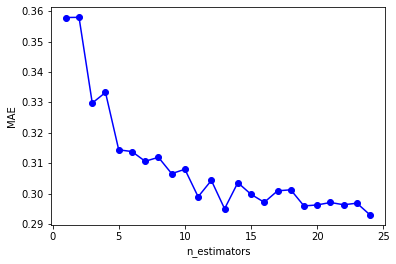

In [101]:
plt.plot(range(1,25),err,'bo-')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.show()

podemos observar que o menor erro ocorre com $12$ estimadores

In [104]:
forest2 = RandomForestClassifier(n_estimators = 12)
forest2.fit(X_train, y_train)
pred = forest2.predict(X_test)
mean_absolute_error(y_test,pred), forest2.score(X_test,y_test)


(0.30657142857142855, 0.6934285714285714)

In [105]:
from sklearn.metrics import confusion_matrix

In [109]:
cm = confusion_matrix(y_test,forest2.predict(X_test))
TN = cm[0][0]
TP= cm[0][1]
FN= cm[1][0]
FP = cm[1][1]

In [110]:
acuracy = (TP + TN)/(TP+TN+FN+FP)
print(cm,acuracy)

[[6244 2442]
 [2923 5891]] 0.49634285714285714


In [111]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7176

In [112]:
cm = confusion_matrix(y_test,clf.predict(X_test))
TN = cm[0][0]
TP= cm[0][1]
FN= cm[1][0]
FP = cm[1][1]
acuracy = (TP + TN)/(TP+TN+FN+FP)
print(cm,acuracy)

[[7087 1599]
 [3343 5471]] 0.49634285714285714


In [113]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)

0.6928

In [114]:
cm = confusion_matrix(y_test,neigh.predict(X_test))
TN = cm[0][0]
TP= cm[0][1]
FN= cm[1][0]
FP = cm[1][1]
acuracy = (TP + TN)/(TP+TN+FN+FP)
print(cm,acuracy)

[[6148 2538]
 [2838 5976]] 0.49634285714285714
